In [1]:
import torch

### Check CUDA availability

In [2]:
torch.cuda.is_available()

True

### Tensor Basics

In [5]:
x1 = torch.empty(3,2)
print(x1)

tensor([[5.7453e-44, 1.4013e-44],
        [1.5695e-43, 1.5975e-43],
        [1.4714e-43, 1.5414e-43]])


In [6]:
x2 = torch.rand(2,2)
print(x2)

tensor([[0.8615, 0.2931],
        [0.0592, 0.2985]])


In [7]:
x3 = torch.zeros(3,4)
print(x3)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [8]:
x4 = torch.ones(2,3)
print(x4)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [9]:
# look at data type
print(x4.dtype)

torch.float32


In [10]:
x5 = torch.ones(2,3, dtype=torch.int)
print(x5.dtype)

torch.int32


In [11]:
print(x5.size())

torch.Size([2, 3])


In [12]:
# tensor from python list
dl1 = [0.2, 0.3, 0.4]
x6 = torch.tensor(dl1, dtype=torch.float16)
print(x6)
print(x6.size())
print(x6.shape)

tensor([0.2000, 0.3000, 0.3999], dtype=torch.float16)
torch.Size([3])
torch.Size([3])


### Tensor Opeartions

In [15]:
# element-wise addition
a1 = torch.rand(2,2)
a2 = torch.ones(2,2)

a_sum = a1 +a2 # same as torch.add(a1,a2) or inplace operation a1.add_(a2) => a1 = a1 + a2

print(a1)
print(a2)
print(a_sum)

tensor([[0.6774, 0.6638],
        [0.8666, 0.8096]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[1.6774, 1.6638],
        [1.8666, 1.8096]])


In [19]:
# elemen-wise subtraction
a_diff = a_sum - a1 # same as torch.sub(a1,a2)

print(a_diff)

tensor([[1., 1.],
        [1., 1.]])


In [21]:
# element-wise mutiplication
a_mul = a1*a2 # same as torch.mul(a1,a2)

print(a_mul)

tensor([[0.6774, 0.6638],
        [0.8666, 0.8096]])


In [23]:
# element-wise division
a_div = a1/a2 # same as torch.div(a1,a2)

print(a_div)

tensor([[0.6774, 0.6638],
        [0.8666, 0.8096]])


### Slicing/reshaping and numpy interops on tensors (like numpy)

In [30]:
b1 = torch.randn(5,4, dtype=torch.float32)
print(b1)

tensor([[ 1.3362, -0.7778,  0.7146, -0.0053],
        [ 0.1108,  0.0149,  0.6968, -1.0412],
        [ 0.1521,  0.1263,  0.5775, -0.1049],
        [ 0.3452, -0.3003, -0.4160,  0.7441],
        [-1.7281, -0.9906, -0.3342, -1.1860]])


In [31]:
# get a row
b1[1, :]

tensor([ 0.1108,  0.0149,  0.6968, -1.0412])

In [32]:
# get a column
b1[:, 2]

tensor([ 0.7146,  0.6968,  0.5775, -0.4160, -0.3342])

In [33]:
# value of a single(i,j) element
b1[1,2].item()

0.6967748403549194

In [34]:
# reshaping a tensor
b2 = b1.view(2, -1)
print(b2)
print(b2.shape)

tensor([[ 1.3362, -0.7778,  0.7146, -0.0053,  0.1108,  0.0149,  0.6968, -1.0412,
          0.1521,  0.1263],
        [ 0.5775, -0.1049,  0.3452, -0.3003, -0.4160,  0.7441, -1.7281, -0.9906,
         -0.3342, -1.1860]])
torch.Size([2, 10])


In [35]:
# torch to numpy conversion
import numpy as np

b_n = b1.numpy()
print(type(b_n)) # both b1 and b_n point to same memory, so changing one will alter the other also.

<class 'numpy.ndarray'>


In [40]:
# numpy to torch conversion
b_n1 = np.ones(5)

b3 = torch.from_numpy(b_n1)
print(type(b3))

<class 'torch.Tensor'>


In [44]:
# convert tensor in gpu to cpu first before converting to numpy
device = torch.device("cuda")

b4 = torch.ones(2,2).to(device)
print(b4)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')


In [45]:
b4.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [46]:
b4.cpu().numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

### Torch autograd

<p>Plot function (x+1)^2 and find its derivative in domain [0,5]

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [68]:
x = torch.linspace(0.0, 5.0, 100, requires_grad=True)
print(x)
print(x.shape)

tensor([0.0000, 0.0505, 0.1010, 0.1515, 0.2020, 0.2525, 0.3030, 0.3535, 0.4040,
        0.4545, 0.5051, 0.5556, 0.6061, 0.6566, 0.7071, 0.7576, 0.8081, 0.8586,
        0.9091, 0.9596, 1.0101, 1.0606, 1.1111, 1.1616, 1.2121, 1.2626, 1.3131,
        1.3636, 1.4141, 1.4646, 1.5152, 1.5657, 1.6162, 1.6667, 1.7172, 1.7677,
        1.8182, 1.8687, 1.9192, 1.9697, 2.0202, 2.0707, 2.1212, 2.1717, 2.2222,
        2.2727, 2.3232, 2.3737, 2.4242, 2.4747, 2.5253, 2.5758, 2.6263, 2.6768,
        2.7273, 2.7778, 2.8283, 2.8788, 2.9293, 2.9798, 3.0303, 3.0808, 3.1313,
        3.1818, 3.2323, 3.2828, 3.3333, 3.3838, 3.4343, 3.4848, 3.5354, 3.5859,
        3.6364, 3.6869, 3.7374, 3.7879, 3.8384, 3.8889, 3.9394, 3.9899, 4.0404,
        4.0909, 4.1414, 4.1919, 4.2424, 4.2929, 4.3434, 4.3939, 4.4444, 4.4949,
        4.5455, 4.5960, 4.6465, 4.6970, 4.7475, 4.7980, 4.8485, 4.8990, 4.9495,
        5.0000], requires_grad=True)
torch.Size([100])


In [69]:
y = x*x + 2*x + 1
print(y)

tensor([ 1.0000,  1.1036,  1.2122,  1.3260,  1.4449,  1.5688,  1.6979,  1.8321,
         1.9713,  2.1157,  2.2652,  2.4198,  2.5794,  2.7442,  2.9141,  3.0891,
         3.2692,  3.4543,  3.6446,  3.8400,  4.0405,  4.2461,  4.4568,  4.6726,
         4.8935,  5.1195,  5.3506,  5.5868,  5.8281,  6.0745,  6.3260,  6.5826,
         6.8443,  7.1111,  7.3830,  7.6600,  7.9421,  8.2294,  8.5217,  8.8191,
         9.1216,  9.4292,  9.7420, 10.0598, 10.3827, 10.7107, 11.0439, 11.3821,
        11.7254, 12.0739, 12.4274, 12.7860, 13.1498, 13.5186, 13.8926, 14.2716,
        14.6557, 15.0450, 15.4393, 15.8388, 16.2433, 16.6530, 17.0677, 17.4876,
        17.9126, 18.3426, 18.7778, 19.2180, 19.6634, 20.1139, 20.5694, 21.0301,
        21.4959, 21.9667, 22.4427, 22.9238, 23.4100, 23.9012, 24.3976, 24.8991,
        25.4057, 25.9174, 26.4341, 26.9560, 27.4830, 28.0151, 28.5523, 29.0946,
        29.6420, 30.1945, 30.7521, 31.3148, 31.8826, 32.4555, 33.0335, 33.6166,
        34.2048, 34.7981, 35.3965, 36.00

In [70]:
v = torch.tensor([1]*x.shape[0], dtype=torch.float32) # not required if function value is scalar
y.backward(v)  # dy/dx
print(x.grad)

tensor([ 2.0000,  2.1010,  2.2020,  2.3030,  2.4040,  2.5051,  2.6061,  2.7071,
         2.8081,  2.9091,  3.0101,  3.1111,  3.2121,  3.3131,  3.4141,  3.5152,
         3.6162,  3.7172,  3.8182,  3.9192,  4.0202,  4.1212,  4.2222,  4.3232,
         4.4242,  4.5253,  4.6263,  4.7273,  4.8283,  4.9293,  5.0303,  5.1313,
         5.2323,  5.3333,  5.4343,  5.5354,  5.6364,  5.7374,  5.8384,  5.9394,
         6.0404,  6.1414,  6.2424,  6.3434,  6.4444,  6.5455,  6.6465,  6.7475,
         6.8485,  6.9495,  7.0505,  7.1515,  7.2525,  7.3535,  7.4545,  7.5556,
         7.6566,  7.7576,  7.8586,  7.9596,  8.0606,  8.1616,  8.2626,  8.3636,
         8.4646,  8.5657,  8.6667,  8.7677,  8.8687,  8.9697,  9.0707,  9.1717,
         9.2727,  9.3737,  9.4747,  9.5758,  9.6768,  9.7778,  9.8788,  9.9798,
        10.0808, 10.1818, 10.2828, 10.3838, 10.4848, 10.5859, 10.6869, 10.7879,
        10.8889, 10.9899, 11.0909, 11.1919, 11.2929, 11.3939, 11.4950, 11.5960,
        11.6970, 11.7980, 11.8990, 12.00

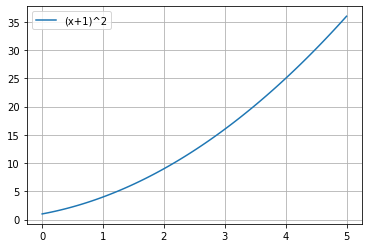

In [75]:
# if tensor is part of computation graph, we need to detach it before converting to numpy
plt.plot(x.detach().numpy(), y.detach().numpy(), label="(x+1)^2")
plt.grid()
plt.legend()
plt.show()

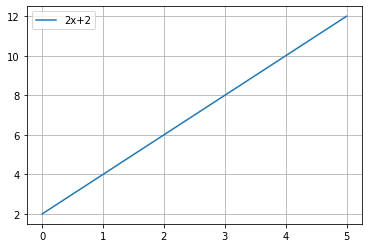

In [76]:
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label="2x+2")
plt.grid()
plt.legend()
plt.show()

<p>
Prevent gradient when performing ops
<li>
x.requires_grad(False)
<li>
x.detach() # creates a copy of tensor where gradient is not calculated
<li>
with torch.no_grad():

<p>
Everytime we call y.backward() gradients are calculated and summed to already present value in x.grad
<p>
To clear previous gradient we should call: x.grad.zero_()